# Stats - normalised, annual

$$z = \frac{X - \mu_{hist}}{\sigma_{hist}}$$

- calculate annual means (or seasonal means for each year)
- calculate the historical mean and standard deviation from the annual means
- normalise
- calculate average of annual normalised data
- calculate ensemble means

In [1]:
import glob
import importlib
import itertools
import os
import sys
from datetime import datetime, timezone
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import climag.climag as cplt
from climag import climag_plot
import pandas as pd

In [22]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

In [12]:
def plot_stats(dataset, transform, seasonal=False):
    if seasonal:
        row = "season"
        figsize = (9, 12.25)
    else:
        row = None
        figsize = (9, 4.75)
    for v in list(dataset.data_vars):
        fig = dataset[v].plot.contourf(x="rlon", y="rlat", col="exp", row=row, subplot_kws={"projection": cplt.projection_hiresireland}, transform=transform, xlim=(-1.775, 1.6), ylim=(-2.1, 2.1), cmap="BrBG", robust=True, extend="both", levels=16, cbar_kwargs={"location": "bottom", "aspect": 30, "pad": 0.085}, figsize=figsize)
        for axis in fig.axs.flat:
            cplt.mask.to_crs(cplt.projection_hiresireland).plot(
                ax=axis, color="white", linewidth=0
            )
            cplt.ie_bbox.to_crs(cplt.projection_hiresireland).plot(
                ax=axis, edgecolor="darkslategrey", color="white", linewidth=0.5
            )
        fig.set_titles("{value}", weight="semibold", fontsize=14)
        plt.show()

## EURO-CORDEX

In [17]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

In [4]:
ds_ec["CNRM-CM5_rcp45"]

<xarray.Dataset> Size: 214MB
Dimensions:       (model: 1, exp: 1, time: 10957, rlat: 33, rlon: 37, bnds: 2)
Coordinates:
    lat           (rlat, rlon) float64 10kB dask.array<chunksize=(33, 37), meta=np.ndarray>
    lon           (rlat, rlon) float64 10kB dask.array<chunksize=(33, 37), meta=np.ndarray>
  * rlat          (rlat) float64 264B 3.685 3.795 3.905 ... 6.985 7.095 7.205
  * rlon          (rlon) float64 296B -17.27 -17.16 -17.05 ... -13.41 -13.3
  * time          (time) datetime64[ns] 88kB 2041-01-01T12:00:00 ... 2070-12-...
    height        float64 8B 2.0
    rotated_pole  |S1 1B b''
    time_bnds     (time, bnds) datetime64[ns] 175kB dask.array<chunksize=(365, 2), meta=np.ndarray>
  * exp           (exp) <U5 20B 'rcp45'
  * model         (model) <U8 32B 'CNRM-CM5'
    spatial_ref   int64 8B 0
Dimensions without coordinates: bnds
Data variables:
    bm            (model, exp, time, rlat, rlon) float32 54MB dask.array<chunksize=(1, 1, 365, 33, 37), meta=np.ndarray>
    pgro          (model, exp, time, rlat, rlon) float32 54MB dask.array<chunksize=(1, 1, 365, 33, 37), meta=np.ndarray>
    gro           (model, exp, time, rlat, rlon) float32 54MB dask.array<chunksize=(1, 1, 365, 33, 37), meta=np.ndarray>
    bm_t          (model, exp, time, rlat, rlon) float32 54MB dask.array<chunksize=(1, 1, 365, 33, 37), meta=np.ndarray>
Attributes:
    creation_date:  2023-03-10 16:22:30.688762+00:00
    contact:        nstreethran@ucc.ie
    frequency:      day
    references:     https://github.com/ClimAg
    input_dataset:  IE_EURO-CORDEX_RCA4_CNRM-CM5_rcp45

In [6]:
ds_ec_norm = cplt.calc_normalised_vars_year(ds_ec)

In [7]:
ds_ec_norm

<xarray.Dataset> Size: 14MB
Dimensions:       (rlat: 33, rlon: 37, model: 4, year: 60, exp: 3)
Coordinates:
  * rlat          (rlat) float64 264B 3.685 3.795 3.905 ... 6.985 7.095 7.205
  * rlon          (rlon) float64 296B -17.27 -17.16 -17.05 ... -13.41 -13.3
  * model         (model) <U10 160B 'CNRM-CM5' 'EC-EARTH' ... 'MPI-ESM-LR'
  * year          (year) int64 480B 1976 1977 1978 1979 ... 2067 2068 2069 2070
  * exp           (exp) <U10 120B 'historical' 'rcp45' 'rcp85'
    lat           (rlat, rlon) float64 10kB dask.array<chunksize=(33, 37), meta=np.ndarray>
    lon           (rlat, rlon) float64 10kB dask.array<chunksize=(33, 37), meta=np.ndarray>
    height        float64 8B 2.0
    rotated_pole  |S1 1B b''
    spatial_ref   int64 8B 0
Data variables:
    bm            (year, model, exp, rlat, rlon) float32 4MB dask.array<chunksize=(1, 1, 1, 33, 37), meta=np.ndarray>
    pgro          (year, model, exp, rlat, rlon) float32 4MB dask.array<chunksize=(1, 1, 1, 33, 37), meta=np.ndarray>
    gro           (year, model, exp, rlat, rlon) float32 4MB dask.array<chunksize=(1, 1, 1, 33, 37), meta=np.ndarray>
    bm_t          (year, model, exp, rlat, rlon) float32 4MB dask.array<chunksize=(1, 1, 1, 33, 37), meta=np.ndarray>

In [8]:
# get interannual mean, and then the ensemble mean
ds_ec_norm_reduced = ds_ec_norm.mean(dim="year", skipna=True).mean(dim="model", skipna=True)

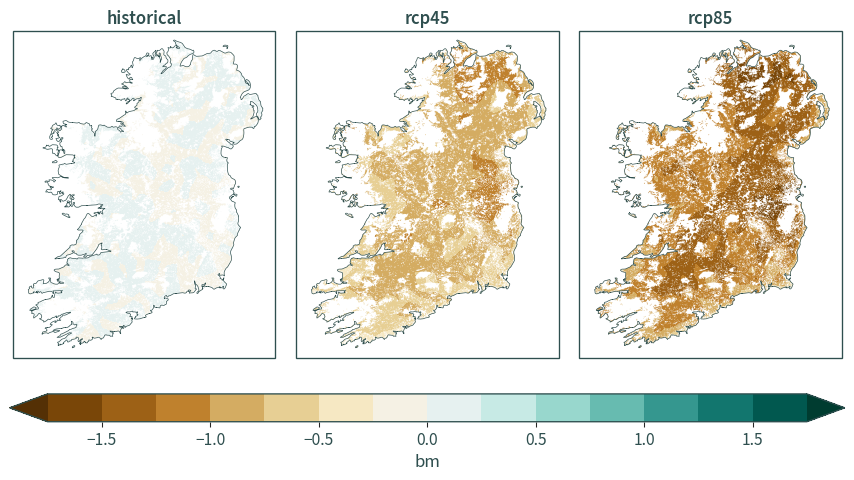

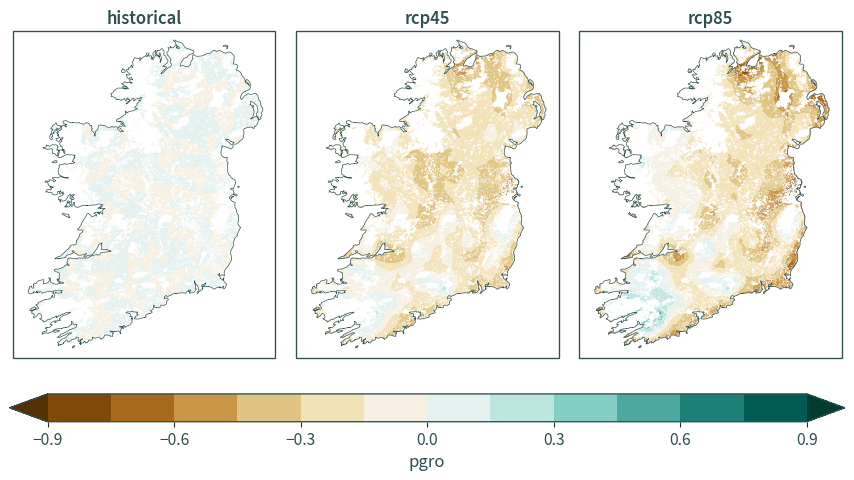

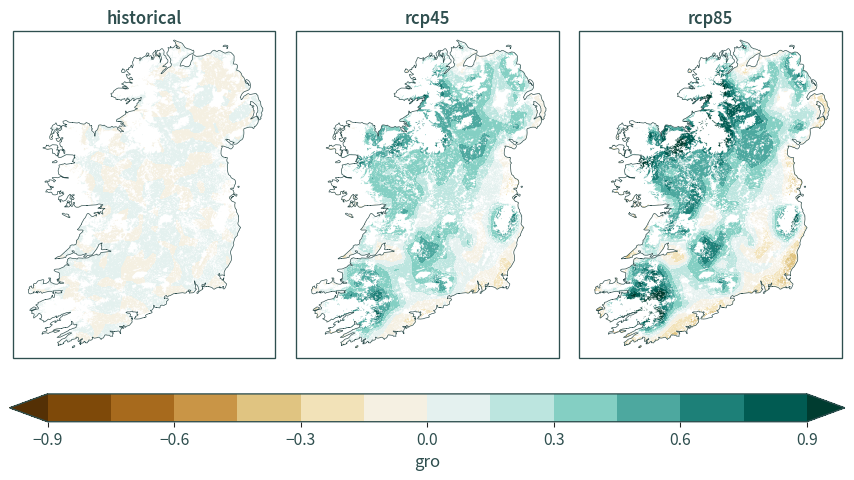

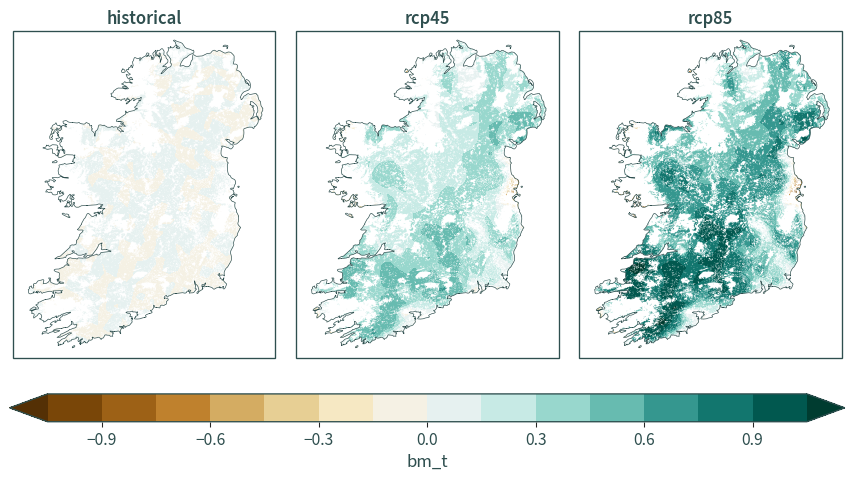

In [9]:
plot_stats(ds_ec_norm_reduced, cplt.projection_eurocordex)

## HiResIreland

In [27]:
ds_hr = cplt.load_all_data("HiResIreland")

In [28]:
ds_hr["CNRM-CM5_rcp45"]

<xarray.Dataset> Size: 2GB
Dimensions:       (model: 1, exp: 1, time: 10957, rlat: 116, rlon: 90, bnds: 2)
Coordinates:
  * time          (time) datetime64[ns] 88kB 2041-01-01T10:30:00 ... 2070-12-...
  * rlon          (rlon) float64 720B -1.68 -1.645 -1.61 ... 1.365 1.4 1.435
  * rlat          (rlat) float64 928B -1.98 -1.945 -1.91 ... 1.975 2.01 2.045
    lon           (rlat, rlon) float32 42kB dask.array<chunksize=(116, 90), meta=np.ndarray>
    lat           (rlat, rlon) float32 42kB dask.array<chunksize=(116, 90), meta=np.ndarray>
    height_2m     float32 4B 2.0
    time_bnds     (time, bnds) datetime64[ns] 175kB dask.array<chunksize=(365, 2), meta=np.ndarray>
    rotated_pole  int64 8B 0
  * exp           (exp) <U5 20B 'rcp45'
  * model         (model) <U8 32B 'CNRM-CM5'
    spatial_ref   int64 8B 0
Dimensions without coordinates: bnds
Data variables:
    bm            (model, exp, time, rlat, rlon) float32 458MB dask.array<chunksize=(1, 1, 365, 116, 90), meta=np.ndarray>
    pgro          (model, exp, time, rlat, rlon) float32 458MB dask.array<chunksize=(1, 1, 365, 116, 90), meta=np.ndarray>
    gro           (model, exp, time, rlat, rlon) float32 458MB dask.array<chunksize=(1, 1, 365, 116, 90), meta=np.ndarray>
    bm_t          (model, exp, time, rlat, rlon) float32 458MB dask.array<chunksize=(1, 1, 365, 116, 90), meta=np.ndarray>
Attributes:
    creation_date:  2023-03-11 10:29:57.847764+00:00
    contact:        nstreethran@ucc.ie
    frequency:      day
    references:     https://github.com/ClimAg
    input_dataset:  IE_HiResIreland_COSMO5_CNRM-CM5_rcp45

In [29]:
ds_hr_norm = cplt.calc_normalised_vars_year(ds_hr)

In [30]:
ds_hr_norm

<xarray.Dataset> Size: 120MB
Dimensions:       (rlon: 90, rlat: 116, model: 4, year: 60, exp: 3)
Coordinates:
  * rlon          (rlon) float64 720B -1.68 -1.645 -1.61 ... 1.365 1.4 1.435
  * rlat          (rlat) float64 928B -1.98 -1.945 -1.91 ... 1.975 2.01 2.045
  * model         (model) <U10 160B 'CNRM-CM5' 'EC-EARTH' ... 'MPI-ESM-LR'
  * year          (year) int64 480B 1976 1977 1978 1979 ... 2067 2068 2069 2070
  * exp           (exp) <U10 120B 'historical' 'rcp45' 'rcp85'
    lon           (rlat, rlon) float32 42kB dask.array<chunksize=(116, 90), meta=np.ndarray>
    lat           (rlat, rlon) float32 42kB dask.array<chunksize=(116, 90), meta=np.ndarray>
    height_2m     float32 4B 2.0
    rotated_pole  int64 8B 0
    spatial_ref   int64 8B 0
Data variables:
    bm            (year, model, exp, rlat, rlon) float32 30MB dask.array<chunksize=(1, 1, 1, 116, 90), meta=np.ndarray>
    pgro          (year, model, exp, rlat, rlon) float32 30MB dask.array<chunksize=(1, 1, 1, 116, 90), meta=np.ndarray>
    gro           (year, model, exp, rlat, rlon) float32 30MB dask.array<chunksize=(1, 1, 1, 116, 90), meta=np.ndarray>
    bm_t          (year, model, exp, rlat, rlon) float32 30MB dask.array<chunksize=(1, 1, 1, 116, 90), meta=np.ndarray>

In [31]:
ds_hr_norm_reduced = ds_hr_norm.mean(dim="year", skipna=True).mean(dim="model", skipna=True)

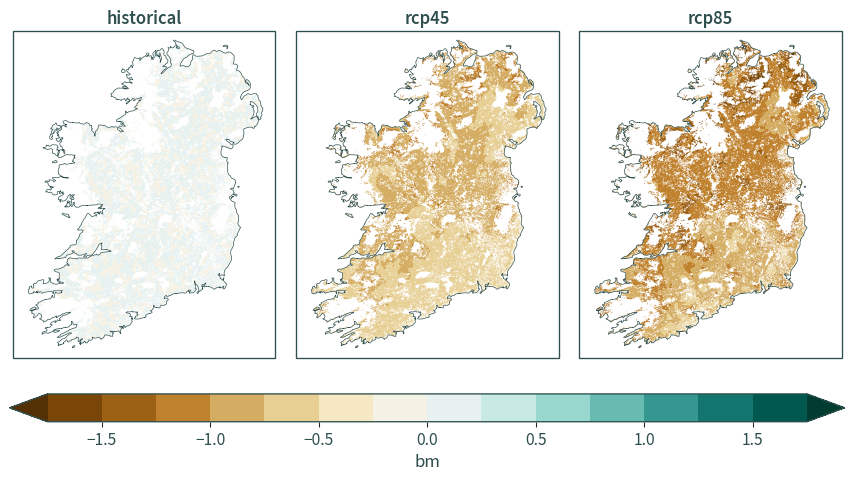

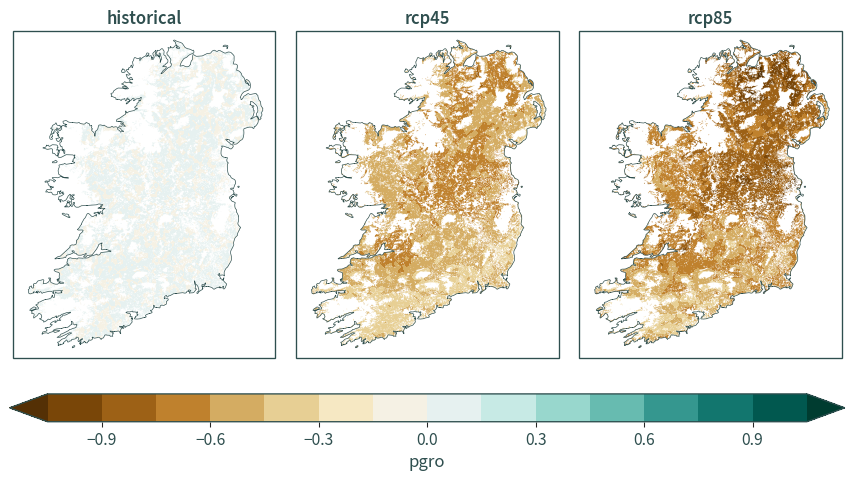

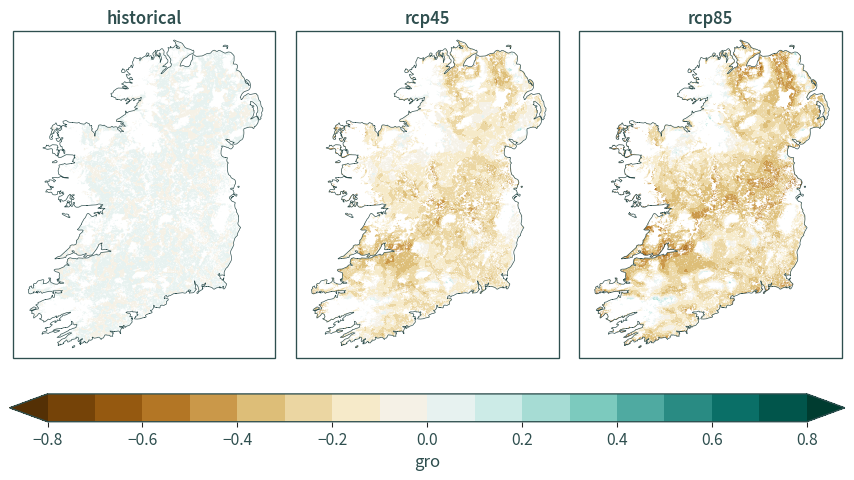

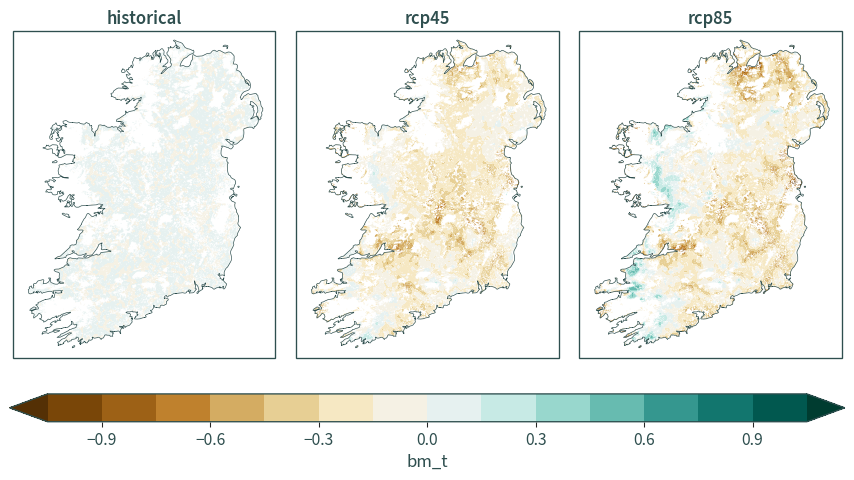

In [32]:
plot_stats(ds_hr_norm_reduced, cplt.projection_hiresireland)